# Sentiment Analysis of Twitter data

## Extracting Twitter data

Importing the required libraries:

In [1]:
import tweepy           # For capturing Twitter's API
import pandas as pd     # For handling data
import numpy as np      # For number computing
import re

from tweepy import OAuthHandler
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In order to extract data from Twitter for analysis, we need to create an app in twitter. 
From this app, we get these credentials that are required to establish connection with twitter via OAuth.
To input these credentials, the authentication handler is called and credentials are provided.
The authenticated API is then returned.

In [3]:
consumer_key = 'hsHOmPdD3dAsH1okJdcRqVijA'
consumer_secret = 'BnROgEPjjkKfTqwjL0ZZJ9loEwq94ingRlLTlEm0xExEvfUjQ5'
access_token = '126617481-7deZK02NUG5BfbmCRLblX2FHjhbQkNWiZYMzSBXV'
access_token_secret = 'd1JeVc3Om8n8QAn5Y7c1W9sE26bE6UpMFDZ7i3hnKVeQq'


# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

Now that the API is setup, we can use this function to create an "extractor" object. With this, we will be able to use Tweepy's function extractor.user_timeline(screen_name, count) to extract tweets from a certain user the and the count of tweets.

### Extracting Data by screen name

In [4]:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=100)
print("Number of tweets extracted: {}.\n".format(len(tweets)))


# We print the most recent 10 tweets:
print("10 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

Number of tweets extracted: 100.

10 recent tweets:

As the world watches, we are days away from passing HISTORIC TAX CUTS for American families and businesses. It will… https://t.co/95522wIKVN
()
When the American People speak, ALL OF US should listen. Just over one year ago, you spoke loud and clear. On Novem… https://t.co/p8hGEg9j3v
()
Over the past 11 months, I have travelled tens of thousands of miles, to visit 13 countries. I have met with more t… https://t.co/ZUveaJ7Hv2
()
Our deepest sympathies and most heartfelt prayers are with the victims of the train derailment in Washington State.… https://t.co/kPYFsuSKL7
()
My thoughts and prayers are with everyone involved in the train accident in DuPont, Washington. Thank you to all of… https://t.co/kw24I2Jm9t
()
The train accident that just occurred in DuPont, WA shows more than ever why our soon to be submitted infrastructur… https://t.co/K1e1absbxG
()
Ivanka Trump will be interviewed on @foxandfriends.
()
Remember, Republicans are 5-

## Handling the Data

### Data frame

Now that we have extracted the data, we can construct a pandas DataFrame, that let's us play with the data.

IPython's display function plots an output in a presentable manner, and the headmethod of a dataframe allows us to visualize the first 10 elements of the dataframe (or the first number of elements that are passed as an argument).

In [5]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Donald Trump Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Donald Trump Tweets
0,"As the world watches, we are days away from pa..."
1,"When the American People speak, ALL OF US shou..."
2,"Over the past 11 months, I have travelled tens..."
3,Our deepest sympathies and most heartfelt pray...
4,My thoughts and prayers are with everyone invo...
5,The train accident that just occurred in DuPon...
6,Ivanka Trump will be interviewed on @foxandfri...
7,"Remember, Republicans are 5-0 in Congressional..."
8,"More than a century after conquering flight, t..."
9,Wonderful weekend at Camp David. A very specia...


## Capturing Meta-data

Why we need to capture meta data?

If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes from the meta data.
This enables us to perform analysis based on various features of the tweet.

In [6]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))


['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


Let us print some data related to a couple tweets

In [7]:
# We print some info from the 10th tweet:

print "Tweet id: {}".format(tweets[9].id)
print(tweets[9].created_at)
print(tweets[9].source)
print(tweets[9].favorite_count)
print(tweets[9].retweet_count)
print(tweets[9].lang)
print(tweets[9].entities)

Tweet id: 942503059103604736
2017-12-17 21:13:34
Twitter for iPhone
55530
9914
en
{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/jN86UYnzYa', u'indices': [111, 134], u'expanded_url': u'https://twitter.com/i/web/status/942503059103604736', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}


In [8]:
# We print some info from the eigth tweet:
print(tweets[7].id)
print(tweets[7].created_at)
print(tweets[7].source)
print(tweets[7].favorite_count)
print(tweets[7].retweet_count)
print(tweets[7].lang)
print(tweets[7].entities)


942717030091943936
2017-12-18 11:23:49
Twitter for iPhone
65362
14667
en
{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/AmcJkgOSRk', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/942717030091943936', u'display_url': u'twitter.com/i/web/status/9\u2026'}]}


### Adding this data to our dataframe

In [9]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['ReTweets']    = np.array([tweet.retweet_count for tweet in tweets])

In [10]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Donald Trump Tweets,len,ID,Date,Likes,ReTweets
0,"As the world watches, we are days away from pa...",140,942857031693799425,2017-12-18 20:40:08,9,7
1,"When the American People speak, ALL OF US shou...",140,942854056162332677,2017-12-18 20:28:19,6513,1589
2,"Over the past 11 months, I have travelled tens...",140,942851788461563906,2017-12-18 20:19:18,11167,2440
3,Our deepest sympathies and most heartfelt pray...,140,942840800853024770,2017-12-18 19:35:38,14138,3408
4,My thoughts and prayers are with everyone invo...,140,942829676699021312,2017-12-18 18:51:26,32841,7138
5,The train accident that just occurred in DuPon...,140,942827072824672262,2017-12-18 18:41:05,43578,10990
6,Ivanka Trump will be interviewed on @foxandfri...,51,942721681130483712,2017-12-18 11:42:18,33098,5095
7,"Remember, Republicans are 5-0 in Congressional...",140,942717030091943936,2017-12-18 11:23:49,65362,14667
8,"More than a century after conquering flight, t...",144,942551516564639744,2017-12-18 00:26:07,51712,11447
9,Wonderful weekend at Camp David. A very specia...,134,942503059103604736,2017-12-17 21:13:34,55530,9914


## Some Analysis on the Data

### Tweet with most number of likes:

In [11]:
# We extract the tweet with most Likes

like_max = np.max(data['Likes'])

fav = data[data.Likes == like_max].index[0]


# Max FAVs:
print("The tweet with maximum likes is: \n{}".format(data['Donald Trump Tweets'][fav]))
print("Number of likes: {}".format(like_max))


The tweet with maximum likes is: 
MAKE AMERICA GREAT AGAIN!
Number of likes: 189038


### Likes vs Retweets visualization plot

In [12]:
# We create time series for data:

tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['ReTweets'].values, index=data['Date'])

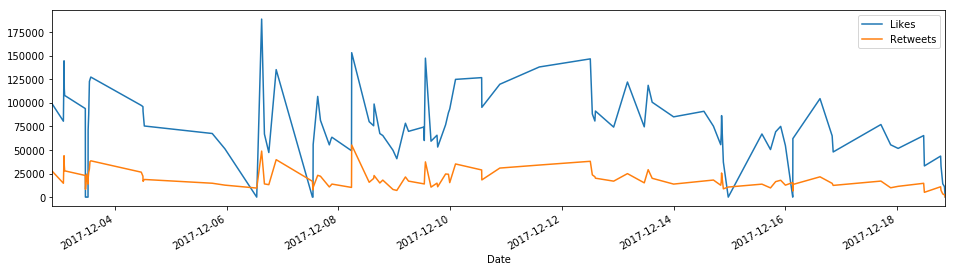

In [13]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


# Sentiment Analysis

##  Using Text Blob

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

The textblob.sentiments module contains two sentiment analysis implementations: 
PatternAnalyzer (based on the pattern library)
NaiveBayesAnalyzer (an NLTK classifier trained on a movie reviews corpus).

The default implementation is pattern analyzer

## PatternAnalyzer

In [14]:
from textblob import TextBlob
import re

#cleaning the tweet
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"
    
def analyze_sentiment_val(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

#### Updating the data frame with Sentiments of tweets

In [15]:
data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data['Donald Trump Tweets'] ])
data['SA_val'] = np.array([ analyze_sentiment_val(tweet) for tweet in data['Donald Trump Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Donald Trump Tweets,len,ID,Date,Likes,ReTweets,SA,SA_val
0,"As the world watches, we are days away from pa...",140,942857031693799425,2017-12-18 20:40:08,9,7,neutral,0
1,"When the American People speak, ALL OF US shou...",140,942854056162332677,2017-12-18 20:28:19,6513,1589,positive,1
2,"Over the past 11 months, I have travelled tens...",140,942851788461563906,2017-12-18 20:19:18,11167,2440,positive,1
3,Our deepest sympathies and most heartfelt pray...,140,942840800853024770,2017-12-18 19:35:38,14138,3408,positive,1
4,My thoughts and prayers are with everyone invo...,140,942829676699021312,2017-12-18 18:51:26,32841,7138,neutral,0
5,The train accident that just occurred in DuPon...,140,942827072824672262,2017-12-18 18:41:05,43578,10990,positive,1
6,Ivanka Trump will be interviewed on @foxandfri...,51,942721681130483712,2017-12-18 11:42:18,33098,5095,neutral,0
7,"Remember, Republicans are 5-0 in Congressional...",140,942717030091943936,2017-12-18 11:23:49,65362,14667,neutral,0
8,"More than a century after conquering flight, t...",144,942551516564639744,2017-12-18 00:26:07,51712,11447,positive,1
9,Wonderful weekend at Camp David. A very specia...,134,942503059103604736,2017-12-17 21:13:34,55530,9914,positive,1


In [16]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Donald Trump Tweets']) if data['SA'][index] == "positive"]
neu_tweets = [ tweet for index, tweet in enumerate(data['Donald Trump Tweets']) if data['SA'][index] == "neutral"]
neg_tweets = [ tweet for index, tweet in enumerate(data['Donald Trump Tweets']) if data['SA'][index] == "negative"]


## Results of Sentiment Analysis

#### Printing the percentage of Positive, negative and neutral tweets:

In [17]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Donald Trump Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Donald Trump Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Donald Trump Tweets'])))

Percentage of positive tweets: 60%
Percentage of neutral tweets: 21%
Percentage de negative tweets: 19%


### Plotting the percentages of tweel polarities in Pie Chart:

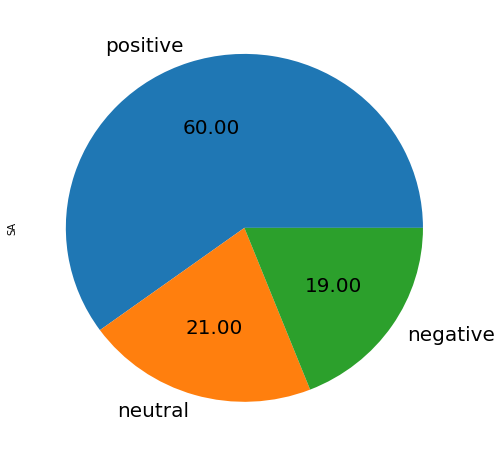

In [18]:
# We create a numpy vector mapped to labels:
sa = ["positive", "neutral", "negative"]
percent = np.zeros(3)

for sentiment in data['SA']:
    for index in range(len(sa)):
        if sentiment == sa[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sa, name='SA')
pie_chart.plot.pie(fontsize=20, autopct='%.2f', figsize=(8, 8));


### Time series plot for sentiment polarities of tweets

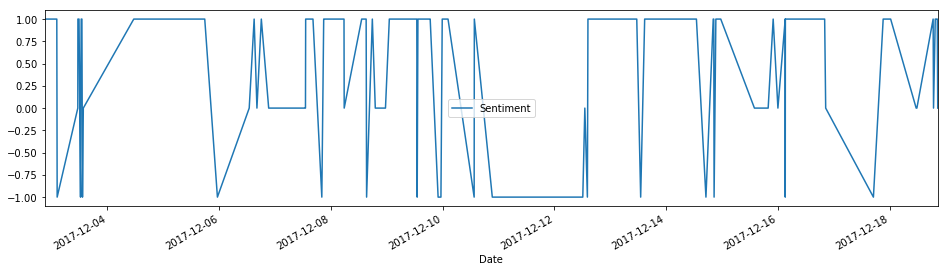

In [19]:
tsa = pd.Series(data=data['SA_val'].values, index=data['Date'])
tsa.plot(figsize=(16,4), label="Sentiment", legend=True);


### Relative analysis of Sentiment polarity of tweets and their retweet count

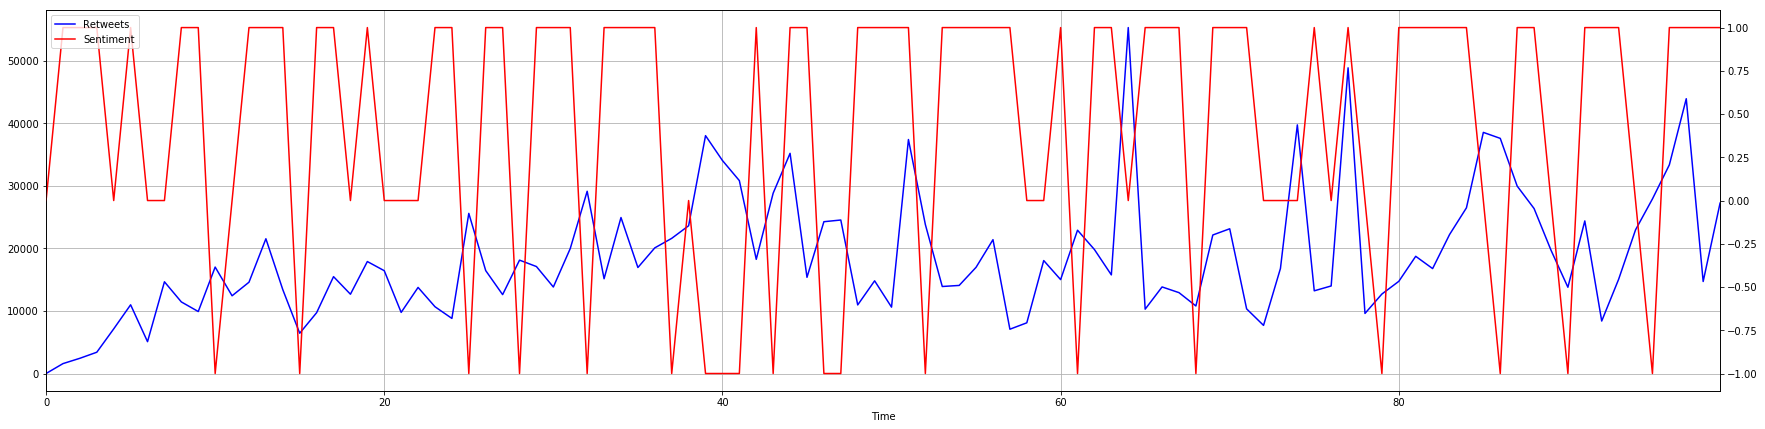

In [21]:
plt.figure(figsize=(30,7))
plt.xlabel('Time')

ax1 = data.ReTweets.plot(color='blue', grid=True, label='Retweets')
ax2 = data.SA_val.plot(color='red', grid=True, secondary_y=True, label='Sentiment')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()


### Relative analysis of Sentiment polarity of tweets and their Likes count


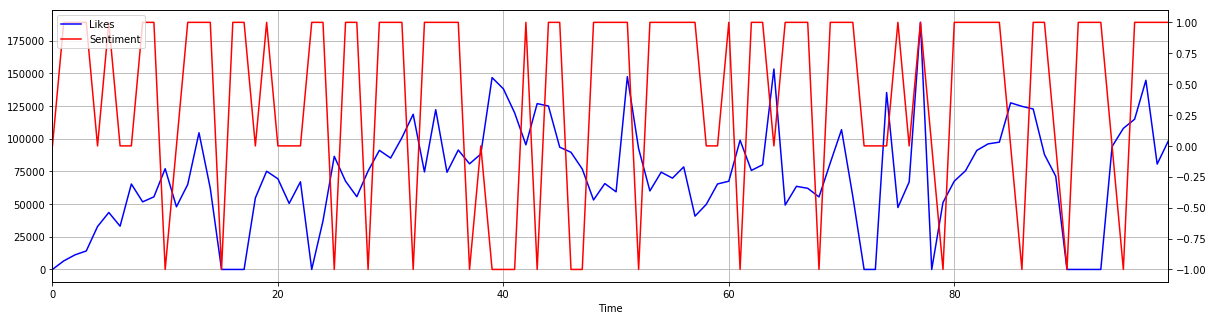

In [22]:
plt.figure(figsize=(20,5))
plt.xlabel('Time')

ax1 = data.Likes.plot(color='blue', grid=True, label='Likes')
ax2 = data.SA_val.plot(color='red', grid=True, secondary_y=True, label='Sentiment')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

## Extracting Data by query

In [26]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
 
def get_tweets(query, count = 10):
    tweets = []
 
  # call twitter api to fetch tweets
    fetched_tweets = extractor.search(q = query, count = count)

    # parsing tweets one by one
    for tweet in fetched_tweets:
        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text)
 
        # appending parsed tweet to tweets list
        if tweet.retweet_count > 0:
        # if tweet has retweets, ensure that it is appended only once
            if parsed_tweet not in tweets:
                tweets.append(parsed_tweet)
        else:
            tweets.append(parsed_tweet)
            # return parsed tweets
    return tweets

 
def main():
    # creating object of TwitterClient Class
    api = twitter_setup()
    # calling function to get tweets
    tweets = get_tweets(query = 'Donald Trump', count = 200)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    nutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100*len(nutweets)/len(tweets)))
 
    # printing first 10 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
 
    # printing first 10 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
 
main()

Positive tweets percentage: 33 %
Negative tweets percentage: 15 %
Neutral tweets percentage: 51 %


Positive tweets:
I liked a @YouTube video https://t.co/fcmijbuOWa Donald Trump’s Jerusalem Announcement Explained | NowThis World
RT @TeaPainUSA: FUN FACT.  Donald Trump appointed Rod Rosenstein as his deputy Attorney General and was confirmed by the Senate April 25, 2…
Twitter bans Britain First leaders after anti-Muslim videos shared by Donald Trump' | via @telegraph https://t.co/3uZoo5q088
RT @PalmerReport: Hey Donald Trump you left some words out of your “America First” slogan. I think you meant to say “Sell Out America First”
RT @PFAUSA1: “Our government’s first duty is to its people, to our citizens — to serve their needs, to ensure their safety, to preserve the…
RT @davidsirota: BREAKING: Orrin Hatch admits he wrote controversial tax provision, which enriches @SenBobCorker, Donald Trump, @SpeakerRya…
RT @hardball: .@JoyAnnReid: "Donald Trump is an authoritarian of the first order 

# Another Use case - Book review - Dan Brown's Origin

#### Here is the review for the "ORIGIN" by Dan Brown.

In [39]:
# creating object of TwitterClient Class
api = twitter_setup()
# calling function to get tweets
btweets = get_tweets(query = 'Dan Brown Origin', count = 200)
 
# picking positive tweets from tweets
ptweets = [tweet for tweet in btweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(btweets)))
# picking negative tweets from tweets
ntweets = [tweet for tweet in btweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(btweets)))
nutweets = [tweet for tweet in btweets if tweet['sentiment'] == 'neutral']
# percentage of neutral tweets
print("Neutral tweets percentage: {} %".format(100*len(nutweets)/len(btweets)))
 
# printing first 10 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:10]:
    print(tweet['text'])
 
    # printing first 10 negative tweets
print("\n\nNegative tweets:")    
for tweet in ntweets[:15]:
    
    print(tweet['text'])
 

Positive tweets percentage: 23 %
Negative tweets percentage: 5 %
Neutral tweets percentage: 70 %


Positive tweets:
Just when I thought Dan Brown has lost his writing prowess... The ending of his new book The Origin gave me major goosebumps. Galing. 👏🏼
#4: Origin: A Novel: Origin: A Novel Dan Brown (Author) (3560) Buy new: $29.95 $13.47 136 used &amp; new from $10.52 (V… https://t.co/IUzaUEKs0F
@jellyparmesan I never read Divergent. It's a dystopian novel right? Dan Brown's books are crime fiction with a lot… https://t.co/cfGXnEslYG
@mathanamuhilan It was the last day of sale and there weren't many famous names left, anymore so I don't think I sa… https://t.co/hNqZqbkSRe
lalalalala~ i have this novel: origin by: dan brown, in my hands ready to read.. lalalala~ no body can bother me..… https://t.co/REfvurdBIh
#Origin, the latest from Dan Brown, is an incredible thriller. 'Fans of #TheDaVinciCode rejoice!' -- People Magazine https://t.co/zx4HlRnvyW
I was an avid Dan Brown fan until his l

##  Using NaiveBayesClassifier

In [41]:
train = [("It is a masterpiece.", "positive"),
  ("The place was being renovated when I visited so the seating was limited.", "negative"),
  ("Loved the ambience, loved the food", "positive"),
  ("The food is delicious but not over the top.", "negative"),
  ("Service - Little slow, probably because too many people.", "negative"),
  ("The place is not easy to locate", "negative"),
]
      

dictionary = set(word.lower() for passage in train for word in word_tokenize(passage[0]))
  
t = [({word: (word in word_tokenize(x[0])) for word in dictionary}, x[1]) for x in train]
  
classifier = nltk.NaiveBayesClassifier.train(t)

test_data = "Loved the ambience"
test_data_features = {word.lower(): (word in word_tokenize(test_data.lower())) for word in dictionary}
print (classifier.classify(test_data_features))

positive


# References

http://textblob.readthedocs.io/en/dev/

https://www.dataquest.io/blog/matplotlib-tutorial/

http://ipullrank.com/step-step-twitter-sentiment-analysis-visualizing-united-airlines-pr-crisis/

https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-